In [1]:
# Image Operations (Histogram Equalization, Correlation and Convolution)

(-0.5, 412.5, 412.5, -0.5)

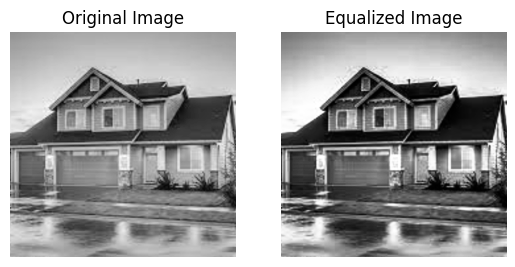

In [2]:
# Using in-built module equalizeHist

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png',cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization (inbuilt module)
equalized_image = cv2.equalizeHist(image)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap = 'gray')
plt.title('Equalized Image')
plt.axis('off')


[   0    0    1    3    6   17   22   25   36   53   58   60   63   85
   89   81   87  101  108  123  114  117  126  125  112  143  145  148
  131  149  175  154  219  228  240  216  270  299  303  337  334  323
  345  425  445  450  520  504  637  767  850  780  755  747  736  803
  780  852  813  808  748  762  767  601  566  505  515  470  425  430
  379  429  443  446  440  440  477  481  506  479  458  504  454  562
  534  549  583  613  592  606  647  620  626  650  707  716  770  792
  759  805  824  788  840  782  723  748  827  801  750  784  837  879
  883  815  859  890  928  907  865  909  953  875  926 1014 1004  973
  947  983  969 1074 1011  977 1040 1036 1050  969 1006  996  978  926
 1029  991 1003  948  978  978  981 1087 1065 1045 1035 1157 1252 1315
 1222 1369 1449 1621 1613 1577 1620 1679 1549 1830 1654 1483 1540 1592
 1522 1578 1374 1332 1555 1396 1402 1537 1743 1554 1544 1379 1323 1357
 1319 1327 1204 1329 1361 1321 1321 1380 1434 1235 1353 1257 1290 1623
 1560 

(-0.5, 412.5, 412.5, -0.5)

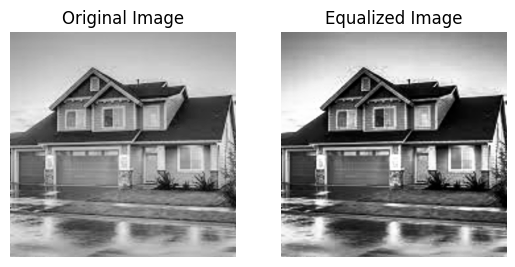

In [6]:
# Without using any inbuilt module

import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    histogram = np.zeros(256, dtype = int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    print(histogram)        
    return histogram

def calculate_cdf(histogram):
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]
    print(cdf)     
    return cdf

def histogram_equalization(image, cdf):
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            equalized_image[i, j] = cdf[pixel_value]
    print(equalized_image)         
    return equalized_image

# Read image file
image = cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png',cv2.IMREAD_GRAYSCALE)

# Calculate histogram
histogram = calculate_histogram(image)

# Calculate cumulative distribution function (CDF)
cdf = calculate_cdf(histogram)

# Normalize the CDF to fit the full intensity range
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Apply histogram equalization
equalized_image = histogram_equalization(image, cdf_normalized)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap = 'gray')
plt.title('Equalized Image')
plt.axis('off')
